In [1]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [4]:
tf.test.is_gpu_available()

True

In [3]:
def accuracy(x,y):
    acc = 0
    for i in range(len(x)):
        if x[i,]==y[i,]:
            acc+=1
        else:
            acc+=0
    rate = acc/len(x)
    print('Accuracy rate is: ',rate)
    
    
def plot(image,ans):
    if len(image) > 10 | len(ans) > 10:
        print('TOO MANY PHOTOS IN ONE TIME!!')
        print('The maximum is 10 photos')
    for i in range(len(image)):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i,...])
        plt.title(ans[i])

In [11]:
path=os.getcwd()+'\\DATA\\picture01'

In [12]:
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
            

Images are all in read_images


In [13]:
print(read_images.shape)

(40000, 100, 100)


In [6]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


In [ ]:
#### 先在現在的位置新增一個名字叫 "checkpoint30_record"的資料夾 , 30 是epoch次數(自行修改)

In [ ]:
#### 先在現在的位置新增一個名字叫 "train_history"的資料夾

In [ ]:
#### 先在現在的位置新增一個名字叫 "image_save"的資料夾

## 第一次開始 (epoch=50)

In [9]:
# model(01)
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model
    model = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint10_record"的資料夾裡

# 檔名這裡 model_iter10_1.hdf5 要自己修改  10是epoch ,1是第一次

filepath="C:\\Users\\user\\Desktop\\project\\checkpoint50_record\\model_iter50_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

train_history_50_1 = model.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

# train_history_10_1要修改 10是epoch ,1是第一次

Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.31473, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 92s - loss: 2.0656 - acc: 0.3147 - val_loss: 2.3330 - val_acc: 0.1911
Epoch 2/50

Epoch 00002: acc improved from 0.31473 to 0.44634, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 87s - loss: 1.3214 - acc: 0.4463 - val_loss: 49.4563 - val_acc: 0.1568
Epoch 3/50

Epoch 00003: acc improved from 0.44634 to 0.48674, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 87s - loss: 1.1783 - acc: 0.4867 - val_loss: 1.3974 - val_acc: 0.4470
Epoch 4/50

Epoch 00004: acc improved from 0.48674 to 0.54879, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 87s - loss: 1.0562 - acc: 0.5488 - val_loss: 1.3857 - val_acc: 0.5138
Epoch 5/50

Epoch 000

22400/22400 - 87s - loss: 0.3546 - acc: 0.8405 - val_loss: 0.6191 - val_acc: 0.7451
Epoch 39/50

Epoch 00039: acc improved from 0.84054 to 0.86103, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 87s - loss: 0.3130 - acc: 0.8610 - val_loss: 0.8291 - val_acc: 0.7029
Epoch 40/50

Epoch 00040: acc did not improve from 0.86103
22400/22400 - 87s - loss: 0.3691 - acc: 0.8298 - val_loss: 0.5512 - val_acc: 0.7493
Epoch 41/50

Epoch 00041: acc did not improve from 0.86103
22400/22400 - 87s - loss: 0.3293 - acc: 0.8536 - val_loss: 0.6074 - val_acc: 0.7391
Epoch 42/50

Epoch 00042: acc did not improve from 0.86103
22400/22400 - 87s - loss: 0.3428 - acc: 0.8526 - val_loss: 2.2954 - val_acc: 0.5435
Epoch 43/50

Epoch 00043: acc did not improve from 0.86103
22400/22400 - 87s - loss: 0.4035 - acc: 0.8077 - val_loss: 0.5643 - val_acc: 0.7378
Epoch 44/50

Epoch 00044: acc did not improve from 0.86103
22400/22400 - 87s - loss: 0.3306 - acc: 0.8580 - va

In [11]:
#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\train_history\train_history_50_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_50_1.history, outhis)  
                              #改

In [ ]:
#### 確認一下 'train_history'資料夾裡有沒有檔案 應該要有一個train_history_30_1.lst的檔案

## 第二次開始

In [12]:
# model2
# 記得改成 model2

def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model2 
#     global model
    model2 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()


tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_2.hdf5 要自己修改  30是epoch ,2是第一次

filepath="C:\\Users\\user\\Desktop\\project\\checkpoint50_record\\model_iter50_2.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_50_2 = model2.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_2要修改 30是epoch ,2是第2次

Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.30692, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 89s - loss: 2.1354 - acc: 0.3069 - val_loss: 2.3314 - val_acc: 0.2141
Epoch 2/50

Epoch 00002: acc improved from 0.30692 to 0.43000, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 87s - loss: 1.4086 - acc: 0.4300 - val_loss: 3.3837 - val_acc: 0.2007
Epoch 3/50

Epoch 00003: acc improved from 0.43000 to 0.46835, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 87s - loss: 1.2409 - acc: 0.4683 - val_loss: 1.8868 - val_acc: 0.2710
Epoch 4/50

Epoch 00004: acc improved from 0.46835 to 0.51638, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 87s - loss: 1.1031 - acc: 0.5164 - val_loss: 1.3775 - val_acc: 0.4363
Epoch 5/50

Epoch 0000

Epoch 41/50

Epoch 00041: acc improved from 0.79134 to 0.79696, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 87s - loss: 0.4098 - acc: 0.7970 - val_loss: 0.7272 - val_acc: 0.7441
Epoch 42/50

Epoch 00042: acc did not improve from 0.79696
22400/22400 - 87s - loss: 0.4456 - acc: 0.7834 - val_loss: 0.7331 - val_acc: 0.7293
Epoch 43/50

Epoch 00043: acc improved from 0.79696 to 0.80661, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 87s - loss: 0.3881 - acc: 0.8066 - val_loss: 0.5385 - val_acc: 0.7419
Epoch 44/50

Epoch 00044: acc improved from 0.80661 to 0.81696, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 87s - loss: 0.3767 - acc: 0.8170 - val_loss: 0.7351 - val_acc: 0.7323
Epoch 45/50

Epoch 00045: acc improved from 0.81696 to 0.82491, saving model to C:\Users\user\Desktop\project\checkpoint50_record\model_iter50_2.hdf5
22400

In [13]:
#把訓練結果(train_history_30_2)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_2 要改,30是epoch ,2是第2次

# file='train_history的資料夾\train_history_30_2.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\train_history\train_history_50_2.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_50_2.history, outhis)  
                              #改

In [ ]:
## 將10次訓練結果化成圖
# 一張 train acc
# 一張 train_loss
# 一張 val acc
# 一張 val_loss

In [8]:
dirpath=r'C:\Users\user\Desktop\project\train_history\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename

['C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_1.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_10.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_2.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_3.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_4.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_5.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_6.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_7.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_8.lst',
 'C:\\Users\\user\\Desktop\\project\\train_history\\train_history_50_9.lst']

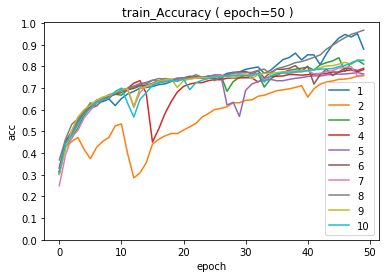

In [10]:
# train acc  50
for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['acc'],label=i+1)
        
    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('train_Accuracy ( epoch=50 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
plt.savefig(r'C:\Users\user\Desktop\project\image_save\train_acc_50.jpg')    #匯出到資料夾 
plt.show()

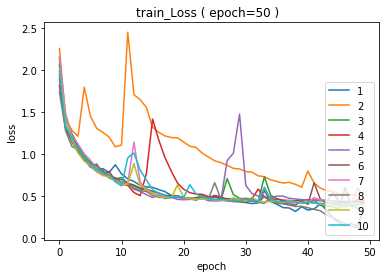

In [11]:
# train loss  50

for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['loss'],label=i+1)
        
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('train_Loss ( epoch=50 )  ') #epoch要改
    plt.legend(loc=4)
   
    
plt.savefig(r'C:\Users\user\Desktop\project\image_save\train_loss_50.jpg')     
plt.show()

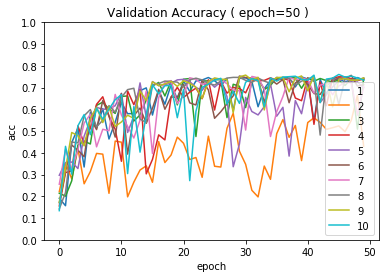

In [12]:
# val acc  50
for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_acc'],label=i+1)

    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('Validation Accuracy ( epoch=50 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
plt.savefig(r'C:\Users\user\Desktop\project\image_save\val_acc_50.jpg') 
plt.show()

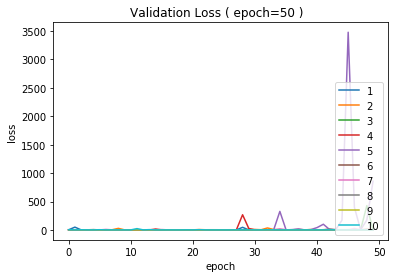

In [13]:
# val loss 50

for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_loss'],label=i+1)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Validation Loss ( epoch=50 )  ') #epoch要改
    plt.legend(loc=4)
   
    
plt.savefig(r'C:\Users\user\Desktop\project\image_save\val_loss_50.jpg') 
plt.show()

In [10]:
# 50
# 紀錄10次train/val的 acc/loss 最高/低 平均
#這裡都不用改喔

train_acc_max_10=[]
train_loss_min_10=[]
val_acc_max_10=[]
val_loss_min_10=[]

for i in range(0,2):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
        train_acc_max_10.append(max(a['acc']))
        train_loss_min_10.append(min(a['loss'])) 
        val_acc_max_10.append(max(a['val_acc']))
        val_loss_min_10.append(min(a['val_loss']))                                         
        
        

print("10次train_acc最高的平均={}".format(round(sum(train_acc_max_10)/len(train_acc_max_10),3)))    
print("10次train_loss最低的平均={}".format(round(sum(train_loss_min_10)/len(train_loss_min_10),3)))
print("10次val_acc最高的平均={}".format(round(sum(val_acc_max_10)/len(val_acc_max_10),3)))    
print("10次val_loss最低的平均={}".format(round(sum(val_loss_min_10)/len(val_loss_min_10),3)))



#之後在給

10次train_acc最高的平均=0.854
10次train_loss最低的平均=0.318
10次val_acc最高的平均=0.707
10次val_loss最低的平均=0.84


# test1(單一程度的修圖_picture01) Accuracy

In [8]:

# 50 
# 自動增長 GPU 記憶體用量
#gpu_options = tf.GPUOptions(allow_growth=True)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# 10 次 test的 acc和 loss的平均(記錄到雲端表格中)
#這裡只要改路徑，其他的不用改

dirpath1=r'C:\Users\user\Desktop\project\checkpoint50_record\*.*' 
filename2=glob.glob(dirpath1)


test_acc=[]
test_loss=[]

for i in range(0,10):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
    test_acc.append(a[1])
    test_loss.append(a[0])

print("10次test_loss平均={}".format(round(sum(test_loss)/len(test_loss),3)))
print("10次test_acc平均={}".format(round(sum(test_acc)/len(test_acc),3) ))



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 12s 2ms/sample - loss: 0.6607 - acc: 0.73601 - E
10次test_loss平均=2.365
10次test_acc平均=0.703


# 第2筆訓練資料

# test2(不同程度的修圖_picture02)  Accuracy

In [2]:
path='C:\\Users\\user\\Desktop\\project\\picture_2'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)          

Images are all in read_images
(40000, 100, 100)


In [3]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


### acc 太低了

In [4]:
dirpath1=r'C:\Users\user\Desktop\project\VGG16_picture\checkpoint50_record\*.*' 
filename2=glob.glob(dirpath1)


test_acc=[]
test_loss=[]

for i in range(0,10):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
    test_acc.append(a[1])
    test_loss.append(a[0])

print("10次test_loss平均={}".format(round(sum(test_loss)/len(test_loss),3)))
print("10次test_acc平均={}".format(round(sum(test_acc)/len(test_acc),3) ))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 9s 1ms/sample - loss: 3.0952 - acc: 0.4200
10次test_loss平均=7.898
10次test_acc平均=0.41
